<a href="https://colab.research.google.com/github/BartBennett/SimStudent/blob/main/Sim_2_Homework_1_HP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SIMULATION 2
HOMEWORK 1: Queues

Due: In class on Monday, May 22, 2023

Name: Hye Min Park

Overall score: ?? / 39 pts

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#### 1.	[12 points] In this problem, we will explore what happens when a different probability distribution is used for the interarrival time. In each case, let the mean service time ($\frac{1}{μ}$) be 1.0, the service time distribution be exponential, and the number of servers (s) be one. Also, use a random number seed of 118 and run the simulation for 1,000 time units.

a) Change the queueing simulation we developed in class to a Python function of λ and μ (these are rates!) with the values of L, W, Lq, Wq, and ρ returned by the function. Use the exponential distribution for the interarrival time, fill out this table and put your code below. [4 points]


$\frac{1}{λ}$  |L      |W      |Lq     |Wq     |ρ                    
---------------|-------|-------|-------|-------|-------
2.00           |0.954  |1.836  |0.478  |0.920  |0.477        
1.50           |1.801  |2.565  |1.128  |1.604  |0.674           
1.10           |8.340  |9.114  |7.476  |8.161  |0.868       
1.05           |23.663 |24.306 |22.733 |23.326 |0.980          

In [ ]:
#entity attributes
class customer:
    def __init__(self, customer_ID, arrival_time, service_time, departure_time):
        self.customer_ID = int(customer_ID)
        self.arrival_time = arrival_time
        self.service_time = service_time
        self.departure_time = departure_time

#events
class event:
    def __init__(self, sim_time, event_type, customer_ID):
        self.sim_time = sim_time
        self.event_type = event_type
        self.customer_ID = int(customer_ID)


#Define Function
#service_time_rate=1/mu
#arrival_time_rate=1/lambda
#num_servers=number of servers

def queue(max_time, service_time_rate, arrival_time_rate, num_servers):
  #init
  np.random.seed(seed=118)
  number_in_the_system = np.zeros(1)
  customers = []
  event_queue = []
  event_queue.append(event(np.random.exponential(arrival_time_rate), "Arrival", 0))
  queue = []
  number_in_the_queue = np.zeros(1)
  queue_time = np.zeros(1)
  sim_time = np.zeros(1)
  servers_idle_time = event_queue[0].sim_time * num_servers
  #function
  while event_queue[0].sim_time <= max_time:
      sim_time = np.append(sim_time, event_queue[0].sim_time)
      if event_queue[0].event_type == 'Arrival':
          #Change system state
          number_in_the_system = np.append(number_in_the_system, number_in_the_system[-1]+1)
          #Create record for customer just arriving
          customers = np.append(customers, customer(event_queue[0].customer_ID, sim_time[-1], 0, 0))
          #Schedule the arrival for the next customer
          event_queue.append(event(sim_time[-1] + np.random.exponential(arrival_time_rate), "Arrival", event_queue[0].customer_ID+1))
          #Arrival and immediate service
          if number_in_the_system[-1] <= num_servers:
              #print("Time: ", sim_time[-1], " Arrival with immediate service: ", event_queue[0].customer_ID)
              #Add the service_time to the customer's record
              customers[-1].service_time = sim_time[-1]
              #Schedule this customer's departure
              event_queue.append(event(sim_time[-1] + np.random.exponential(service_time_rate), "Departure", event_queue[0].customer_ID))
              #Calculate idle time for serevers for every customer except the first
              if len(customers) > 1:
                  servers_idle_time += (sim_time[-1] - sim_time[-2]) * (num_servers - number_in_the_system[-2])
          #Arrival and wait in the queue
          else:
              #print("Time: ", sim_time[-1], " Arrival, waiting in queue: ", event_queue[0].customer_ID)
              #Add customer to queue
              queue = np.append(queue, event_queue[0].customer_ID)
              #Increment the number in the queue
              number_in_the_queue = np.append(number_in_the_queue, number_in_the_queue[-1]+1)
              #Add the sim_time for plotting the queue length
              queue_time = np.append(queue_time, sim_time[-1])
      else:
          #Change system state
          number_in_the_system = np.append(number_in_the_system, number_in_the_system[-1]-1)
          #Add the deparure time to the customer's record
          customers[event_queue[0].customer_ID].departure_time = sim_time[-1]
          #Departure with the next person in the queue served
          if number_in_the_system[-1] >= num_servers:
              #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " Serving: ", queue[0])
              #Add service time for customer who was in the queue
              customers[int(queue[0])].service_time = sim_time[-1]
              #Schedule the departure for this customer
              event_queue.append(event(sim_time[-1] + np.random.exponential(service_time_rate), "Departure", queue[0]))
              #Remove this customer from the queue
              queue = np.delete(queue, 0)
              #Decrement the number in the queue
              number_in_the_queue = np.append(number_in_the_queue, number_in_the_queue[-1]-1)
              #Add the sim_time for plotting the queue length
              queue_time = np.append(queue_time, sim_time[-1])
          #Departure with the next person with no one in the queue
          else:
              #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " system empty")
              #Calculate idle time
              servers_idle_time += (sim_time[-1] - sim_time[-2]) * (num_servers - number_in_the_system[-2])
      #Delete event just processed
      del event_queue[0]
      #Sort the event queue
      event_queue.sort(key = lambda x : x.sim_time)

  return customers, servers_idle_time


In [ ]:
#simulation variables
max_time=1000
service_time_rate = 1.0
arrival_time_rate = [2.0, 1.5, 1.10, 1.05]
num_servers =1


#Iterations
for i in arrival_time_rate:
  customers, servers_idle_time = queue(max_time, service_time_rate, i, num_servers)
  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  last_departed = last_served
  while customers[last_departed].departure_time == 0:
    last_departed -= 1
  sum_person_time = sum(customers[c].departure_time - customers[c].arrival_time for c in range(0,last_departed))
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  print("The interarrival time is ",i)
  print("L = ",sum_person_time/customers[last_departed].departure_time)
  print("Lq = ",sum_person_queue_time/customers[last_served].service_time)
  print("W = ",sum_person_time/last_departed)
  print("Wq = ",sum_person_queue_time/last_served)
  print("rho = ", 1 - servers_idle_time/max_time/num_servers)


The interarrival time is  2.0
L =  0.954270193094885
Lq =  0.4782134762160548
W =  1.8358539531943951
Wq =  0.9199513255234407
rho =  0.47694007373171965
The interarrival time is  1.5
L =  1.8013668721504221
Lq =  1.1278519906186442
W =  2.5653239193597495
Wq =  1.6046210587505139
rho =  0.6735241226022841
The interarrival time is  1.1
L =  8.33965188339828
Lq =  7.475872947829486
W =  9.113529010833068
Wq =  8.160677026247328
rho =  0.8678694009507926
The interarrival time is  1.05
L =  23.66335146611795
Lq =  22.733215194847126
W =  24.305546261250456
Wq =  23.32619373669737
rho =  0.9804902513891712



$\frac{1}{λ}$  |L      |W      |Lq     |Wq     |ρ                    
---------------|-------|-------|-------|-------|-------
2.00           |0.954  |1.836  |0.478  |0.920  |0.477        
1.50           |1.801  |2.565  |1.128  |1.604  |0.674           
1.10           |8.340  |9.114  |7.476  |8.161  |0.868       
1.05           |23.663 |24.306 |22.733 |23.326 |0.980          

#As we increase the rate of arrival (decrease the inter-arrival time), we can observe both the number of people and the wait time are increasing exponentially.

b) Using a controlling routine outside the queueing calculation function, loop through the values of $\frac{1}{λ}$ from 1.01 to 1.5 in steps of 0.01 and plot the results for Lq.  [3 pts]

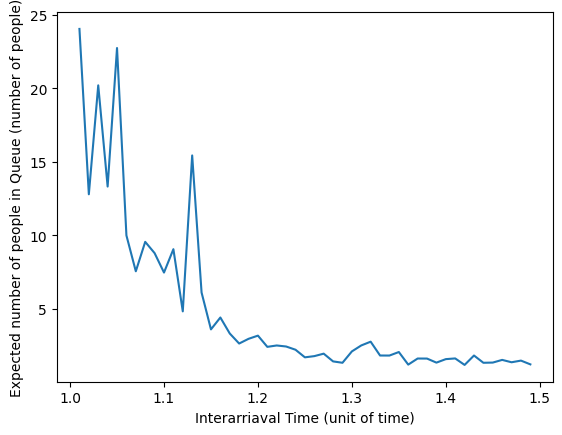

In [ ]:
#Put code and results here
#variables
max_time=1000
service_time_rate = 1.0
arrival_time_rate = np.arange(1.01,1.5,0.01)
num_servers =1
#init
L_q =[]

for i in arrival_time_rate:
  customers, servers_idle_time = queue(max_time, service_time_rate, i, num_servers)
  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  last_departed = last_served
  while customers[last_departed].departure_time == 0:
    last_departed -= 1
  sum_person_time = sum(customers[c].departure_time - customers[c].arrival_time for c in range(0,last_departed))
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  people_waiting = sum_person_queue_time/customers[last_served].service_time
  L_q= np.append(L_q, people_waiting)

plt.plot(arrival_time_rate, L_q)
plt.xlabel("Interarriaval Time (unit of time)")
plt.ylabel("Expected number of people in Queue (number of people)")
plt.show()


c) Change the arrival distribution to a beta distribution with parameters a = 0.5 and b = 0.5 (see the numpy.random.beta function). Note: unlike numpy.random.exponential, the numpy.random.beta function provides random numbers only on the interval (0, 1) and has the mean $\frac{a}{a+b}$. To get a beta distribution with mean M, it is necessary to multiply the numpy.random.beta function by $\frac{a+b}{a}$*M.  

We wish to compare the outcomes of the queueing model for the inerarrival times with the exponential distribution and with the beta distribution when their **means are equal**. Repeat the plot in b) and include a curve with the results from interarrivals with the beta districution.    [2 pts]

In [ ]:
#define the beta distribution queueing model

def queue_beta(max_time, a, b, service_time_rate, arrival_time_mean, num_servers):
  #init
  np.random.seed(seed=118)
  number_in_the_system = np.zeros(1)
  customers = []
  event_queue = []
  event_queue.append(event(np.random.beta(a,b)*(a+b)/a*arrival_time_mean, "Arrival", 0))
  queue = []
  number_in_the_queue = np.zeros(1)
  queue_time = np.zeros(1)
  sim_time = np.zeros(1)
  servers_idle_time = event_queue[0].sim_time * num_servers
  #function
  while event_queue[0].sim_time <= max_time:
      sim_time = np.append(sim_time, event_queue[0].sim_time)
      if event_queue[0].event_type == 'Arrival':
          #Change system state
          number_in_the_system = np.append(number_in_the_system, number_in_the_system[-1]+1)
          #Create record for customer just arriving
          customers = np.append(customers, customer(event_queue[0].customer_ID, sim_time[-1], 0, 0))
          #Schedule the arrival for the next customer
          event_queue.append(event(sim_time[-1] + np.random.beta(a,b)*(a+b)/a*arrival_time_mean, "Arrival", event_queue[0].customer_ID+1))
          #Arrival and immediate service
          if number_in_the_system[-1] <= num_servers:
              #print("Time: ", sim_time[-1], " Arrival with immediate service: ", event_queue[0].customer_ID)
              #Add the service_time to the customer's record
              customers[-1].service_time = sim_time[-1]
              #Schedule this customer's departure
              event_queue.append(event(sim_time[-1] + np.random.exponential(service_time_rate), "Departure", event_queue[0].customer_ID))
              #Calculate idle time for serevers for every customer except the first
              if len(customers) > 1:
                  servers_idle_time += (sim_time[-1] - sim_time[-2]) * (num_servers - number_in_the_system[-2])
          #Arrival and wait in the queue
          else:
              #print("Time: ", sim_time[-1], " Arrival, waiting in queue: ", event_queue[0].customer_ID)
              #Add customer to queue
              queue = np.append(queue, event_queue[0].customer_ID)
              #Increment the number in the queue
              number_in_the_queue = np.append(number_in_the_queue, number_in_the_queue[-1]+1)
              #Add the sim_time for plotting the queue length
              queue_time = np.append(queue_time, sim_time[-1])
      else:
          #Change system state
          number_in_the_system = np.append(number_in_the_system, number_in_the_system[-1]-1)
          #Add the deparure time to the customer's record
          customers[event_queue[0].customer_ID].departure_time = sim_time[-1]
          #Departure with the next person in the queue served
          if number_in_the_system[-1] >= num_servers:
              #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " Serving: ", queue[0])
              #Add service time for customer who was in the queue
              customers[int(queue[0])].service_time = sim_time[-1]
              #Schedule the departure for this customer
              event_queue.append(event(sim_time[-1] + np.random.exponential(service_time_rate), "Departure", queue[0]))
              #Remove this customer from the queue
              queue = np.delete(queue, 0)
              #Decrement the number in the queue
              number_in_the_queue = np.append(number_in_the_queue, number_in_the_queue[-1]-1)
              #Add the sim_time for plotting the queue length
              queue_time = np.append(queue_time, sim_time[-1])
          #Departure with the next person with no one in the queue
          else:
              #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " system empty")
              #Calculate idle time
              servers_idle_time += (sim_time[-1] - sim_time[-2]) * (num_servers - number_in_the_system[-2])
      #Delete event just processed
      del event_queue[0]
      #Sort the event queue
      event_queue.sort(key = lambda x : x.sim_time)

  return customers, servers_idle_time


In [ ]:
#variables
a = 0.5
b = 0.5
max_time=1000
service_time_rate = 1.0
arrival_time_mean = np.arange(1.01,1.5,0.01)
num_servers =1

#inititialize
L_q_beta =[]

for i in arrival_time_mean:
  customers, servers_idle_time = queue_beta(max_time, a, b, service_time_rate, i, num_servers)
  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  last_departed = last_served
  while customers[last_departed].departure_time == 0:
    last_departed -= 1
  sum_person_time = sum(customers[c].departure_time - customers[c].arrival_time for c in range(0,last_departed))
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  people_waiting = sum_person_queue_time/customers[last_served].service_time
  L_q_beta= np.append(L_q_beta, people_waiting)


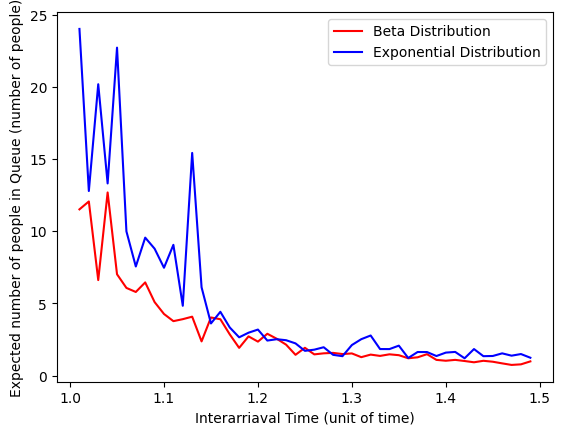

In [ ]:
plt.plot(arrival_time_rate, L_q_beta, label="Beta Distribution", color="red")
plt.plot(arrival_time_rate, L_q, label="Exponential Distribution", color="blue")
plt.xlabel("Interarriaval Time (unit of time)")
plt.ylabel("Expected number of people in Queue (number of people)")
plt.legend()
plt.show()

d) Consider the case where 1/λ = 1.05.  Use the queueing simulation to fill out the following table. Explain, in general terms, why the shape of arrival distribution has the observed impact on the queueing model results. [3 points]



Distribution|a     |b     |L      |W      |Lq     |Wq     |ρ                    
------------|------|------|-------|-------|-------|-------|-------
Exponential |-     |-     |23.663 |24.306 |22.733 |23.326 |0.980    
Beta        |0.5   |0.5   | 7.935 | 8.316 | 7.024 | 7.354 |0.914            
Beta        |5.0   |1.0   | 6.489 | 6.920 | 5.571 | 5.935 |0.927            
Beta        |1.0   |5.0   |16.092 |16.515 |15.154 |15.533 |0.958   
       

In [ ]:
#variables
ab = [(0.5,0.5), (5.0,1.0), (1.0,5.0)]
max_time= 1000
service_time_rate = 1.0
arrival_time_mean = 1.05
num_servers =1

#inititialize

for a, b in ab:
  customers, servers_idle_time = queue_beta(max_time, a, b, service_time_rate, arrival_time_mean, num_servers)
  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  last_departed = last_served
  while customers[last_departed].departure_time == 0:
    last_departed -= 1
  sum_person_time = sum(customers[c].departure_time - customers[c].arrival_time for c in range(0,last_departed))
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  people_waiting = sum_person_queue_time/customers[last_served].service_time
  print("The values for beta distribution are ","a= ",a,"b= ", b)
  print("L = ",sum_person_time/customers[last_departed].departure_time)
  print("Lq = ",sum_person_queue_time/customers[last_served].service_time)
  print("W = ",sum_person_time/last_departed)
  print("Wq = ",sum_person_queue_time/last_served)
  print("rho = ", 1 - servers_idle_time/max_time/num_servers)

The values for beta distribution are  a=  0.5 b=  0.5
L =  7.934702670661534
Lq =  7.023599921986511
W =  8.316106405502975
Wq =  7.3535008760460014
rho =  0.9142698921178198
The values for beta distribution are  a=  5.0 b=  1.0
L =  6.4888706804629015
Lq =  5.5711773931625626
W =  6.9202980918517545
Wq =  5.935255549438212
rho =  0.92725408485947
The values for beta distribution are  a=  1.0 b=  5.0
L =  16.092447832614297
Lq =  15.153617961824484
W =  16.514601575222073
Wq =  15.532562968779215
rho =  0.9581488822073929


sample mean for a= 0.5 b= 0.5 1.0337319821736624
sample mean for a= 5.0 b= 1.0 1.0521952351032298
sample mean for a= 1.0 b= 5.0 1.0347021960156821
sample mean for exponential distribution 1.0347021960156821


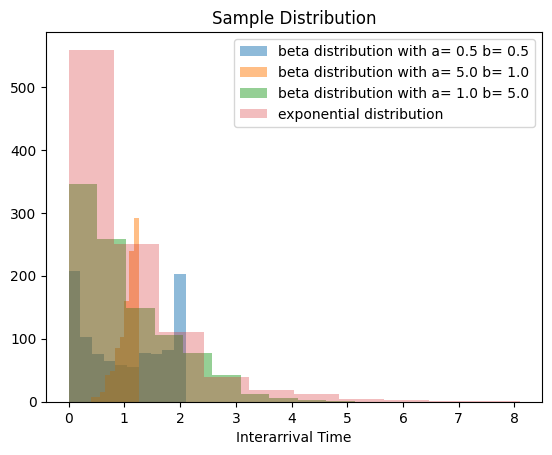

In [ ]:
ab = [(0.5,0.5), (5.0,1.0), (1.0,5.0)]
arrival_time_mean = 1.05

for a,b in ab:
  np.random.seed(seed=118)
  samples =[]
  for i in range(1000):
    draw=np.random.beta(a,b)*(a+b)/a*arrival_time_mean
    samples = np.append(samples, draw)
  plt.hist(samples, label=f"beta distribution with a= {a} b= {b}",alpha=0.5 )
  print(f"sample mean for a= {a} b= {b}",np.mean(samples))

ex_samples=[]
np.random.seed(seed=118)
for i in range(1000):
  draw=np.random.exponential(arrival_time_mean)
  ex_samples = np.append(ex_samples, draw)
plt.hist(ex_samples, label=f"exponential distribution",alpha=0.3)
print(f"sample mean for exponential distribution",np.mean(samples))
plt.legend()
plt.xlabel("Interarrival Time")
plt.title("Sample Distribution")
plt.show()

# Include your explanation here.

Above graph shows the distribution of interarrival time samples (n=1000 for each distribution) we get from different distributions and distribution parameters (a and b). Even though each sample have the mean value close to the (1/λ= 1.05), the distribution and the range of values make different impact on the queues in a system. The distribution that has downward sloping shape (the green and pink histogram) will have more frequent samples with lower interarrival times. This can increase the queue waiting time as more people are coming into the system given time. However, the upward sloping shape (the orange histogram with a=5.0 b=1.0) have samples clusters more for higher interarrival time values. This will have relatively less busy system (less time to wait in the queue) as people arrive less frequently given time.

2) [10 points] In this problem, we will see what happens with different service time distributions. In each case, let the mean interarrival time ($\frac{1}{λ}$) be 2.0, the interarrival time distribution be exponential, and the number of servers (s) be one. Also, use a random number seed of 118 and run the simulation for 1,000 time units.

a) Use the exponential distribution for the service time and fill out this table and put your code below. [2 points]

$\frac{1}{λ}$  |L     |W      |Lq     |Wq    |ρ                    
---------------|-------|-------|-------|-------|-------
1.00           |0.954  |1.836  |0.478  |0.920  |0.477   
1.50           |3.299  |6.196  |2.548  |4.776  |0.763           
1.90           |9.757  |19.399 |8.908  |17.675 |0.856       
1.95           |9.225  |18.259 |8.432  |16.480 |0.885          


In [ ]:
#simulation variables
max_time=1000
service_time_rate = [1.00,1.50,1.90,1.95]
arrival_time_rate = 2.0
num_servers =1

#Iterations
for i in service_time_rate:
  customers, servers_idle_time = queue(max_time, i, arrival_time_rate, num_servers)
  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  last_departed = last_served
  while customers[last_departed].departure_time == 0:
    last_departed -= 1
  sum_person_time = sum(customers[c].departure_time - customers[c].arrival_time for c in range(0,last_departed))
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  print("The service time is ",i)
  print("L = ","{:.3f}".format(sum_person_time/customers[last_departed].departure_time))
  print("Lq = ","{:.3f}".format(sum_person_queue_time/customers[last_served].service_time))
  print("W = ","{:.3f}".format(sum_person_time/last_departed))
  print("Wq = ","{:.3f}".format(sum_person_queue_time/last_served))
  print("rho = ","{:.3f}".format(1 - servers_idle_time/max_time/num_servers))


The service time is  1.0
L =  0.954
Lq =  0.478
W =  1.836
Wq =  0.920
rho =  0.477
The service time is  1.5
L =  3.299
Lq =  2.548
W =  6.196
Wq =  4.776
rho =  0.763
The service time is  1.9
L =  9.757
Lq =  8.908
W =  19.399
Wq =  17.675
rho =  0.856
The service time is  1.95
L =  9.225
Lq =  8.342
W =  18.259
Wq =  16.480
rho =  0.885


b) Using a controlling routine outside the queueing calculation function, loop through the values of $\frac{1}{μ}$ from 1.50 to 1.95 in steps of 0.01 and plot the results for Lq. [2 pts]

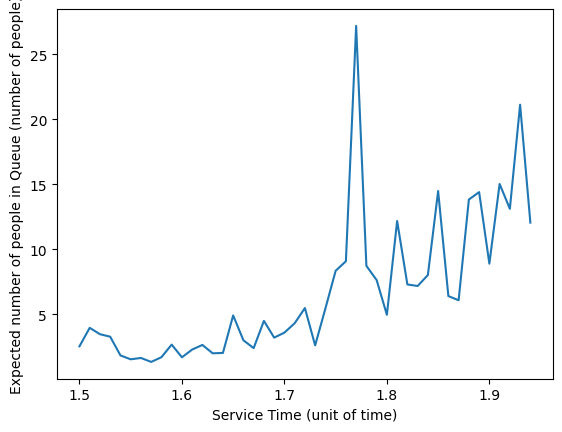

In [ ]:
#Put code and results here
#variables
max_time=1000
arrival_time_rate = 2.0
service_time_rate = np.arange(1.50,1.95,0.01)
num_servers =1
#init
L_q1 =[]

for i in service_time_rate:
  customers, servers_idle_time = queue(max_time, i, arrival_time_rate, num_servers)
  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  last_departed = last_served
  while customers[last_departed].departure_time == 0:
    last_departed -= 1
  sum_person_time = sum(customers[c].departure_time - customers[c].arrival_time for c in range(0,last_departed))
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  people_waiting = sum_person_queue_time/customers[last_served].service_time
  L_q1= np.append(L_q1, people_waiting)

plt.plot(service_time_rate, L_q1)
plt.xlabel("Service Time (unit of time)")
plt.ylabel("Expected number of people in Queue (number of people)")
plt.show()


c) Change the service time distribution to a uniform distribution with a lower bound 25% below the mean and an upper bound 25% above the mean.  We wish to compare the outcomes of the queueing model for the service times with the exponential distribution and with the uniform distribution when their means are equal. Repeat the plot in b) and include a curve with the results from service times with the uniform districution. [2 pts]

In [ ]:
#define the uniform distribution queueing model

def queue_uni(max_time, bound, service_time_mean, arrival_time_rate, num_servers):
  #init
  np.random.seed(seed=118)
  number_in_the_system = np.zeros(1)
  customers = []
  event_queue = []
  event_queue.append(event(np.random.exponential(arrival_time_rate), "Arrival", 0))
  queue = []
  number_in_the_queue = np.zeros(1)
  queue_time = np.zeros(1)
  sim_time = np.zeros(1)
  servers_idle_time = event_queue[0].sim_time * num_servers
  #function
  while event_queue[0].sim_time <= max_time:
      sim_time = np.append(sim_time, event_queue[0].sim_time)
      if event_queue[0].event_type == 'Arrival':
          #Change system state
          number_in_the_system = np.append(number_in_the_system, number_in_the_system[-1]+1)
          #Create record for customer just arriving
          customers = np.append(customers, customer(event_queue[0].customer_ID, sim_time[-1], 0, 0))
          #Schedule the arrival for the next customer
          event_queue.append(event(sim_time[-1] + np.random.exponential(arrival_time_rate), "Arrival", event_queue[0].customer_ID+1))
          #Arrival and immediate service
          if number_in_the_system[-1] <= num_servers:
              #print("Time: ", sim_time[-1], " Arrival with immediate service: ", event_queue[0].customer_ID)
              #Add the service_time to the customer's record
              customers[-1].service_time = sim_time[-1]
              #Schedule this customer's departure
              event_queue.append(event(sim_time[-1] + np.random.uniform(low=service_time_mean*(1-bound),high=service_time_mean*(1+bound)), "Departure", event_queue[0].customer_ID))
              #Calculate idle time for serevers for every customer except the first
              if len(customers) > 1:
                  servers_idle_time += (sim_time[-1] - sim_time[-2]) * (num_servers - number_in_the_system[-2])
          #Arrival and wait in the queue
          else:
              #print("Time: ", sim_time[-1], " Arrival, waiting in queue: ", event_queue[0].customer_ID)
              #Add customer to queue
              queue = np.append(queue, event_queue[0].customer_ID)
              #Increment the number in the queue
              number_in_the_queue = np.append(number_in_the_queue, number_in_the_queue[-1]+1)
              #Add the sim_time for plotting the queue length
              queue_time = np.append(queue_time, sim_time[-1])
      else:
          #Change system state
          number_in_the_system = np.append(number_in_the_system, number_in_the_system[-1]-1)
          #Add the deparure time to the customer's record
          customers[event_queue[0].customer_ID].departure_time = sim_time[-1]
          #Departure with the next person in the queue served
          if number_in_the_system[-1] >= num_servers:
              #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " Serving: ", queue[0])
              #Add service time for customer who was in the queue
              customers[int(queue[0])].service_time = sim_time[-1]
              #Schedule the departure for this customer
              event_queue.append(event(sim_time[-1] + np.random.uniform(low=service_time_mean*(1-bound),high=service_time_mean*(1+bound)), "Departure", queue[0]))
              #Remove this customer from the queue
              queue = np.delete(queue, 0)
              #Decrement the number in the queue
              number_in_the_queue = np.append(number_in_the_queue, number_in_the_queue[-1]-1)
              #Add the sim_time for plotting the queue length
              queue_time = np.append(queue_time, sim_time[-1])
          #Departure with the next person with no one in the queue
          else:
              #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " system empty")
              #Calculate idle time
              servers_idle_time += (sim_time[-1] - sim_time[-2]) * (num_servers - number_in_the_system[-2])
      #Delete event just processed
      del event_queue[0]
      #Sort the event queue
      event_queue.sort(key = lambda x : x.sim_time)

  return customers, servers_idle_time


In [ ]:
#Put code and results here
#variables
max_time=1000
arrival_time_rate = 2.0
num_servers =1
service_time_mean = np.arange(1.50,1.95,0.01)
bound=0.25
#init
L_q2 =[]

for i in service_time_mean:
  customers, servers_idle_time = queue_uni(max_time, bound, i, arrival_time_rate, num_servers)
  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  last_departed = last_served
  while customers[last_departed].departure_time == 0:
    last_departed -= 1
  sum_person_time = sum(customers[c].departure_time - customers[c].arrival_time for c in range(0,last_departed))
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  people_waiting = sum_person_queue_time/customers[last_served].service_time
  L_q2= np.append(L_q2, people_waiting)

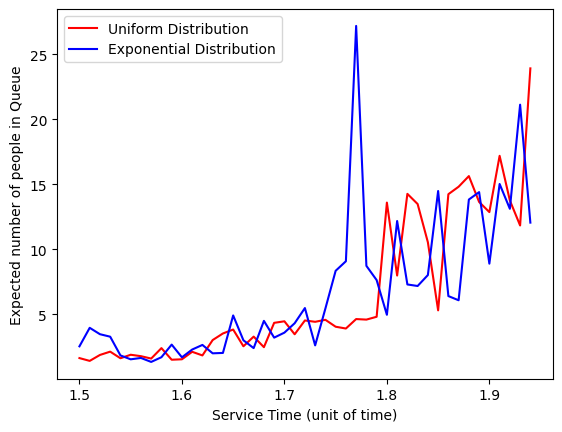

In [ ]:
plt.plot(service_time_rate, L_q2, label="Uniform Distribution", color="red")
plt.plot(service_time_rate, L_q1, label="Exponential Distribution", color="blue")
plt.xlabel("Service Time (unit of time)")
plt.ylabel("Expected number of people in Queue")
plt.legend()
plt.show()

d) Now add a curve to the plot in c) where the service times are constant with the same vaule as the means of the other plots. Explain what you observe. [4 pts]

In [ ]:
#define the uniform distribution queueing model

def queue_constant(max_time, service_time_mean, arrival_time_rate, num_servers):
  #init
  np.random.seed(seed=118)
  number_in_the_system = np.zeros(1)
  customers = []
  event_queue = []
  event_queue.append(event(np.random.exponential(arrival_time_rate), "Arrival", 0))
  queue = []
  number_in_the_queue = np.zeros(1)
  queue_time = np.zeros(1)
  sim_time = np.zeros(1)
  servers_idle_time = event_queue[0].sim_time * num_servers
  #function
  while event_queue[0].sim_time <= max_time:
      sim_time = np.append(sim_time, event_queue[0].sim_time)
      if event_queue[0].event_type == 'Arrival':
          #Change system state
          number_in_the_system = np.append(number_in_the_system, number_in_the_system[-1]+1)
          #Create record for customer just arriving
          customers = np.append(customers, customer(event_queue[0].customer_ID, sim_time[-1], 0, 0))
          #Schedule the arrival for the next customer
          event_queue.append(event(sim_time[-1] + np.random.exponential(arrival_time_rate), "Arrival", event_queue[0].customer_ID+1))
          #Arrival and immediate service
          if number_in_the_system[-1] <= num_servers:
              #print("Time: ", sim_time[-1], " Arrival with immediate service: ", event_queue[0].customer_ID)
              #Add the service_time to the customer's record
              customers[-1].service_time = sim_time[-1]
              #Schedule this customer's departure
              event_queue.append(event(sim_time[-1] + service_time_mean, "Departure", event_queue[0].customer_ID))
              #Calculate idle time for serevers for every customer except the first
              if len(customers) > 1:
                  servers_idle_time += (sim_time[-1] - sim_time[-2]) * (num_servers - number_in_the_system[-2])
          #Arrival and wait in the queue
          else:
              #print("Time: ", sim_time[-1], " Arrival, waiting in queue: ", event_queue[0].customer_ID)
              #Add customer to queue
              queue = np.append(queue, event_queue[0].customer_ID)
              #Increment the number in the queue
              number_in_the_queue = np.append(number_in_the_queue, number_in_the_queue[-1]+1)
              #Add the sim_time for plotting the queue length
              queue_time = np.append(queue_time, sim_time[-1])
      else:
          #Change system state
          number_in_the_system = np.append(number_in_the_system, number_in_the_system[-1]-1)
          #Add the deparure time to the customer's record
          customers[event_queue[0].customer_ID].departure_time = sim_time[-1]
          #Departure with the next person in the queue served
          if number_in_the_system[-1] >= num_servers:
              #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " Serving: ", queue[0])
              #Add service time for customer who was in the queue
              customers[int(queue[0])].service_time = sim_time[-1]
              #Schedule the departure for this customer
              event_queue.append(event(sim_time[-1] + service_time_mean, "Departure", queue[0]))
              #Remove this customer from the queue
              queue = np.delete(queue, 0)
              #Decrement the number in the queue
              number_in_the_queue = np.append(number_in_the_queue, number_in_the_queue[-1]-1)
              #Add the sim_time for plotting the queue length
              queue_time = np.append(queue_time, sim_time[-1])
          #Departure with the next person with no one in the queue
          else:
              #print("Time: ", sim_time[-1], " Departure: ", event_queue[0].customer_ID, " system empty")
              #Calculate idle time
              servers_idle_time += (sim_time[-1] - sim_time[-2]) * (num_servers - number_in_the_system[-2])
      #Delete event just processed
      del event_queue[0]
      #Sort the event queue
      event_queue.sort(key = lambda x : x.sim_time)

  return customers, servers_idle_time

In [ ]:
#Put code and results here
#variables
max_time=1000
arrival_time_rate = 2.0
num_servers =1
service_time_mean = np.arange(1.50,1.95,0.01)

#init
L_q3 =[]

for i in service_time_mean:
  customers, servers_idle_time = queue_constant(max_time, i, arrival_time_rate, num_servers)
  last_arrived = customers[-1].customer_ID
  last_served = last_arrived
  while customers[last_served].service_time == 0:
    last_served -= 1
  last_departed = last_served
  while customers[last_departed].departure_time == 0:
    last_departed -= 1
  sum_person_time = sum(customers[c].departure_time - customers[c].arrival_time for c in range(0,last_departed))
  sum_person_queue_time = sum(customers[c].service_time - customers[c].arrival_time for c in range(0,last_served))
  people_waiting = sum_person_queue_time/customers[last_served].service_time
  L_q3= np.append(L_q3, people_waiting)


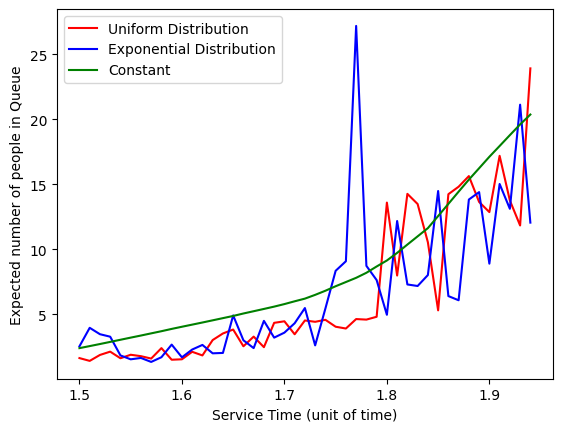

In [ ]:
plt.plot(service_time_rate, L_q2, label="Uniform Distribution", color="red")
plt.plot(service_time_rate, L_q1, label="Exponential Distribution", color="blue")
plt.plot(service_time_rate, L_q3, label="Constant", color="green")
plt.xlabel("Service Time (unit of time)")
plt.ylabel("Expected number of people in Queue")
plt.legend()
plt.show()

# Put your explanation here.

It looks like all graphs have the similar slope of upward trend where increasing service time will increase the number of people in the queue. There is no randomness for constant as it will always have the same value for service time. However the exponential distribution has a large spike in the middle. This might be from exponential distribution having a long tale for the large values. Even though the mean service time of 1.9 is higher than the service time for the spike, we can observe the very high number of people in the queue. This is because low-frequency and extremely high service times can slow down the entire system.

Exponential distribution will include the low-frequency and high-magnitude events while uniform distribution has the low and high bound with the same probability of occuring. The choice of distribution matters!

# **This is the end of this homework!**

3)	[17 points] The Department of Motor Vehicle (DMV) would like to increase the efficiency of its operations.  Everyone coming into the DMV office must first wait in the "sign-in" line. Currently, they have 1 person who takes, on average, 5 minutes to perform the sign-in tasks.  Assume that, on average, 250 people enter the DMV during the business day from 8am to 5pm.  Assume the inter-arrival and service times are exponentially distributed.

a)	Describe how you will define this as a queueing problem. [3 points]  


Put your answer here

b) Describe how you will set up a simulation experiment to obtain observations from this system and determine a statistically valid result. [2 points]

Put your answer here


c) How long, on average, do people wait in the line before getting service and how many people are in the system at 5pm?  [4 points]

Put your answer here

The DMV is thinking about adding 2 extra sign-in stations.  They realize they could design the line for the sign-in process in two ways.  The first way is to have a single line with the person at the head of the line served by the next available server (a single-channel queue).  The second way is to have people line up behind one of the servers when they first come in (a multi-channel queue).  Let's assume that no one gets discouraged and leaves (either balking or reneging) and everyone stays in the line they initially join (no jockeying).

d) Extend the two-server simulation we did in class to a three-server model in which people pick the shortest line to enter when they first come in the DMV. Ties in the shortest line length are broken randomly. [4 points]


In [ ]:
#Provide your code here

e) Describe how you will set up a simulation experiment to obtain observations for comparing the single- and multi-channel systems. What method do yo use to determine a statistically valid result? [2 points]

Put your answer here

f) Which system is better? Why? [2 points]

Put your answer here